# 0.0. Imports:

In [97]:
import pandas as pd

import inflection 

import math

import nbextensions

import datetime

import seaborn as sns

from matplotlib import pyplot as plt
from IPython.core.display import HTML 
from IPython.display import Image

import matplotlib.gridspec as gridSpec

# 0.1. Loading data:

In [98]:
df_sales_raw = pd.read_csv( 'train.csv', low_memory=False )

df_store_raw = pd.read_csv( 'store.csv', low_memory=False )

#merge

df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store')

In [99]:
df_raw.sample()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
635258,494,1,2013-12-09,6924,1056,1,0,0,0,b,a,1260.0,6.0,2011.0,0,NaN,NaN,NaN


# 1.0. Data description:

In [100]:
df1 = df_raw.copy()

In [101]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# 1.1 Rename Columns:

In [102]:
df1.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [103]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

# rename
df1.columns = cols_new

In [104]:
df1.columns

Index(['store', 'day_of_week', 'date', 'sales', 'customers', 'open', 'promo',
       'state_holiday', 'school_holiday', 'store_type', 'assortment',
       'competition_distance', 'competition_open_since_month',
       'competition_open_since_year', 'promo2', 'promo2_since_week',
       'promo2_since_year', 'promo_interval'],
      dtype='object')

# 1.2. Data Dimensions:

In [105]:
print ( 'Number of Rows: {}'.format( df1.shape[0] ) )
print ( 'Number of Cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of Cols: 18


# 1.3. Data Types:

In [106]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [107]:
df1['date'] = pd.to_datetime(df1['date'])

In [108]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

# 1.4. Check 'NAs':

In [109]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

# 1.5. Fillout 'NA':

In [110]:
# competition_distance              2642
# competition_open_since_month    323348
# competition_open_since_year     323348
# promo2                               0
# promo2_since_week               508031
# promo2_since_year               508031
# promo_interval                  508031                

In [111]:
# competition_distance:

df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan( x ) else x )

In [112]:
# competition_open_since_month:

df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month'] ) else x['competition_open_since_month'], axis=1 )

In [113]:
# competition_open_since_year:

df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['competition_open_since_year'] ) else x['competition_open_since_year'], axis=1 ) 

In [114]:
# promo2_since_week:

df1['promo2_since_week'] = df1.apply( lambda x: x['date'].week if math.isnan( x['promo2_since_week'] ) else x['promo2_since_week'], axis=1 )

In [115]:
# promo2_since_year:

df1['promo2_since_year'] = df1.apply( lambda x: x['date'].year if math.isnan( x['promo2_since_year'] ) else x['promo2_since_year'], axis=1 )

In [116]:
# promo_interval:

month_map = {1: 'Jan', 2: 'Fev', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec' }

df1['promo_interval'].fillna(0, inplace=True )

df1['month_map'] = df1['date'].dt.month.map( month_map )

df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1 )

In [117]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

In [118]:
df1.sample(5).T

,129233,860831,990441,537071,337154
store,1009,837,1107,427,873
day_of_week,2,2,5,5,1
date,2015-04-07 00:00:00,2013-05-21 00:00:00,2013-01-25 00:00:00,2014-03-07 00:00:00,2014-09-15 00:00:00
sales,5109,2843,6228,8723,5412
customers,475,423,689,826,609
open,1,1,1,1,1
promo,0,0,1,1,1
state_holiday,0,0,0,0,0
school_holiday,1,0,0,1,0
store_type,a,a,a,a,a


# 1.6. Change Types:

In [119]:
df1 = df1.copy()

In [120]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [121]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')

In [122]:
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype( 'int64' ) 

In [123]:
df1['promo2_since_week'] = df1['promo2_since_week'].astype( 'int64' ) 

In [124]:
df1['promo2_since_year'] = df1['promo2_since_year'].astype( 'int64' )  

In [125]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month             int64
competition_open_since_year              int64
promo2                                   int64
promo2_since_week                        int64
promo2_since_year                        int64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

# 1.7. Descriptive Statistical:

In [126]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )

cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64[ns]'] )

In [127]:
num_attributes.sample(2)

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
556102,503,2,6589,458,1,1,0,13080.0,9,2006,1,14,2011,0
322046,698,3,17420,2022,1,1,0,1790.0,5,2011,0,40,2014,0


In [128]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
543875,0,a,c,0,Mar
241469,c,d,c,"Jan,Apr,Jul,Oct",Dec


# 1.7.1 Numerical Attributes:

In [129]:
import numpy as np

In [130]:
# Central Tendency - mean, median:

ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame( num_attributes.apply(  np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply(  min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns =  [ 'attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis' ] 

In [131]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


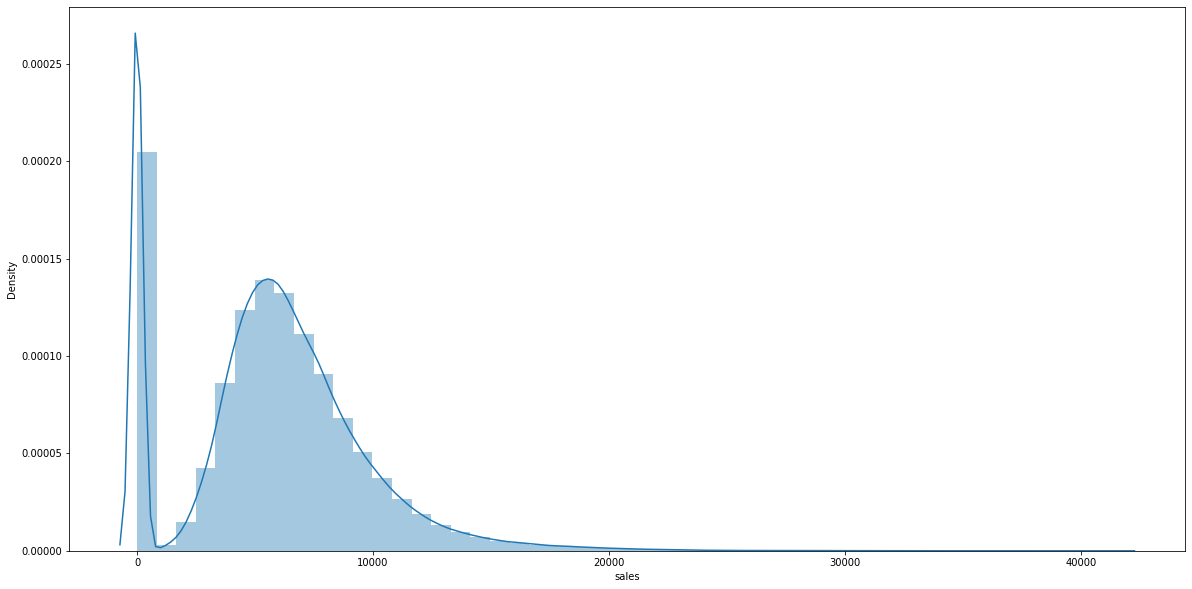

In [132]:
sns.distplot( df1['sales'] )
plt.rcParams['figure.figsize'] = (20, 10)

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

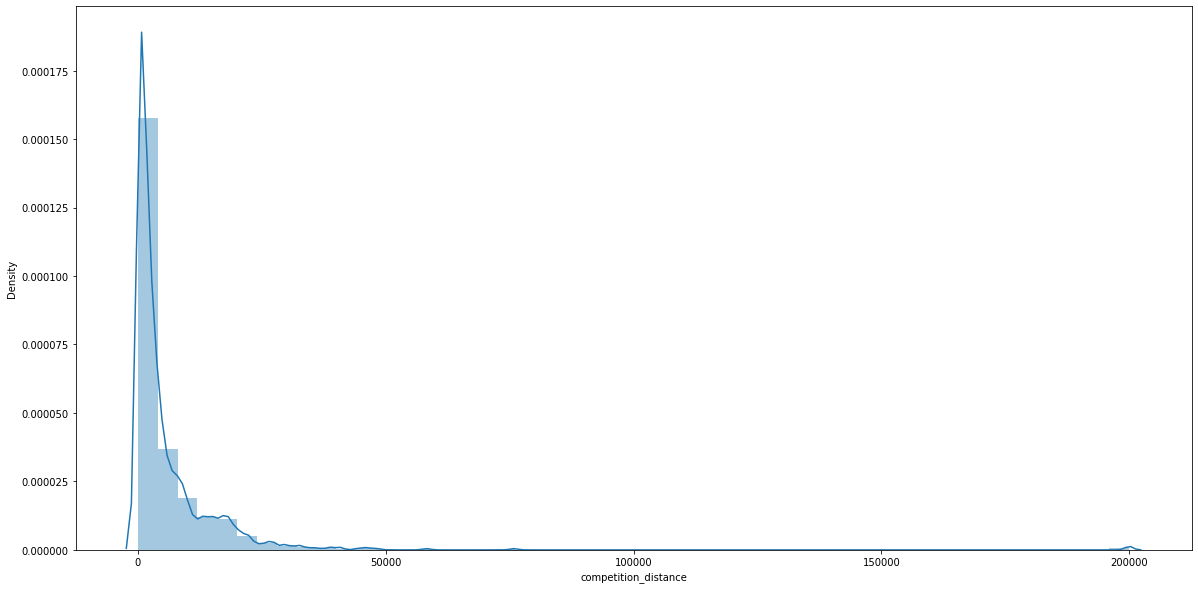

In [133]:
sns.distplot( df1['competition_distance'] )
plt.rcParams['figure.size']=(20,10)

# 1.7.2 Categorical Attributes:

In [134]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='state_holiday', ylabel='sales'>

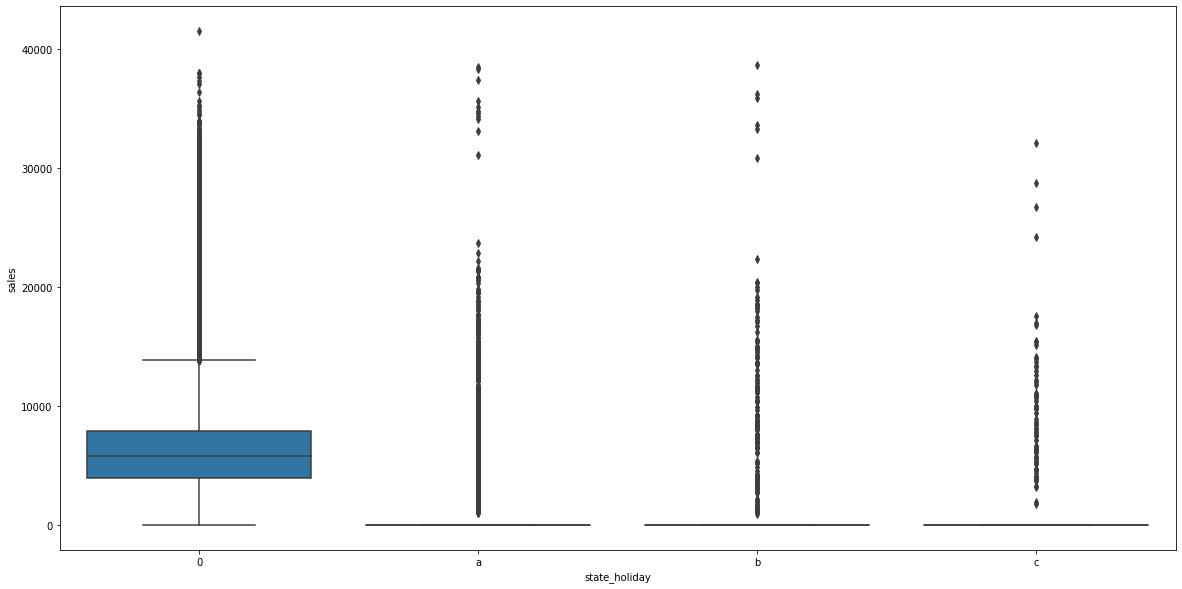

In [135]:
# state_holiday => 4

sns.boxplot( x ='state_holiday' , y ='sales', data = df1)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

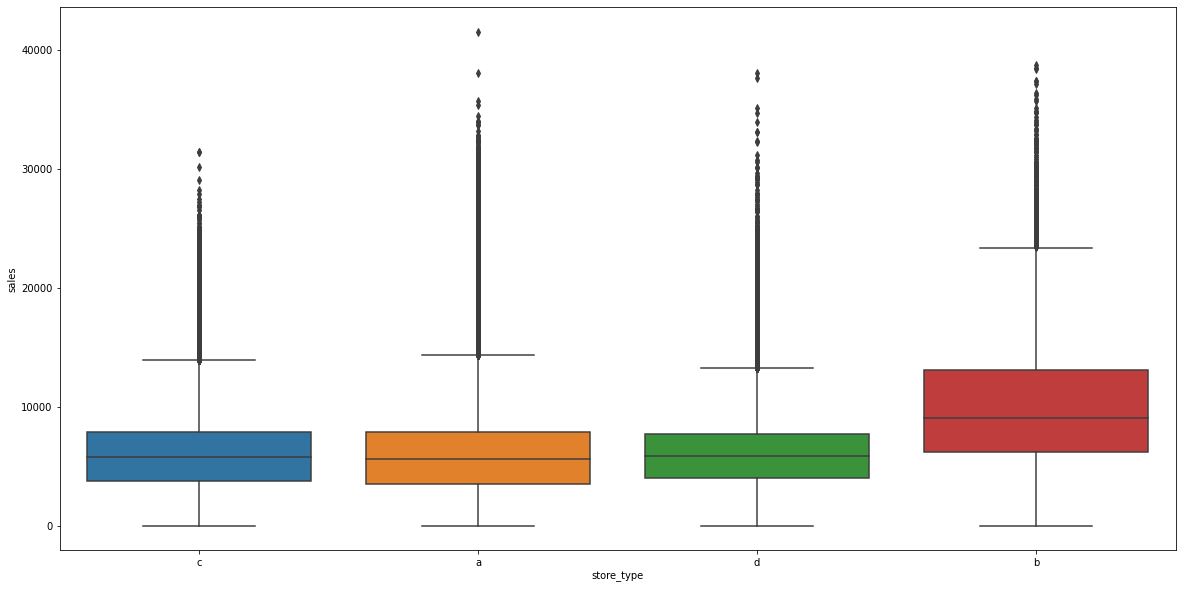

In [136]:
# store_type => 4

sns.boxplot( x='store_type', y='sales', data=df1)
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

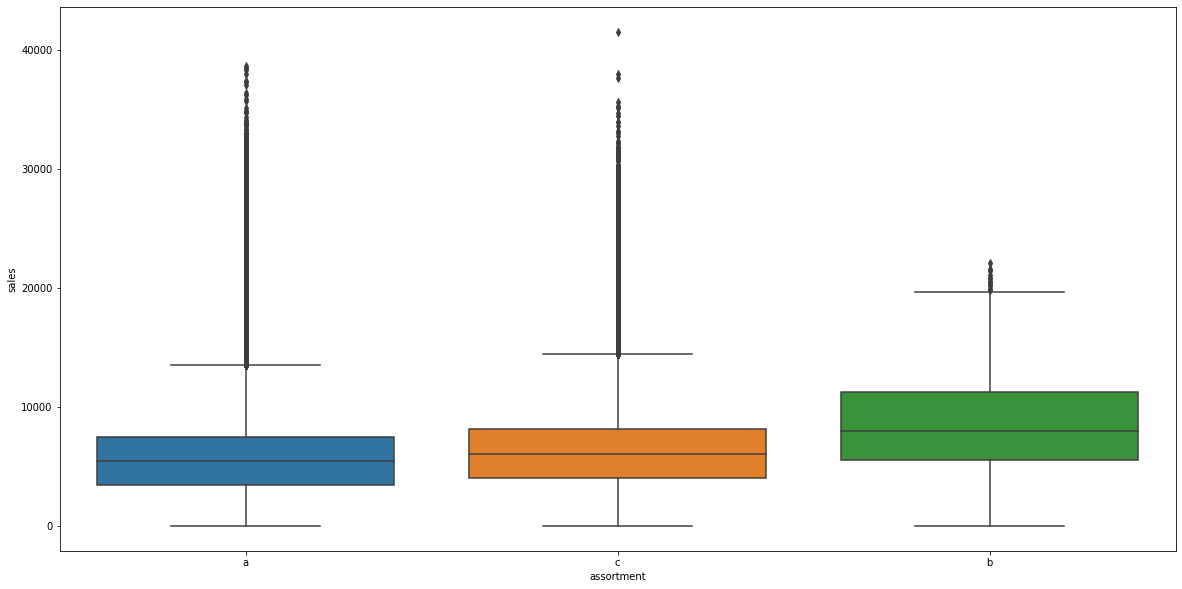

In [137]:
# assortment => 3

sns.boxplot( x='assortment', y='sales', data=df1)
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

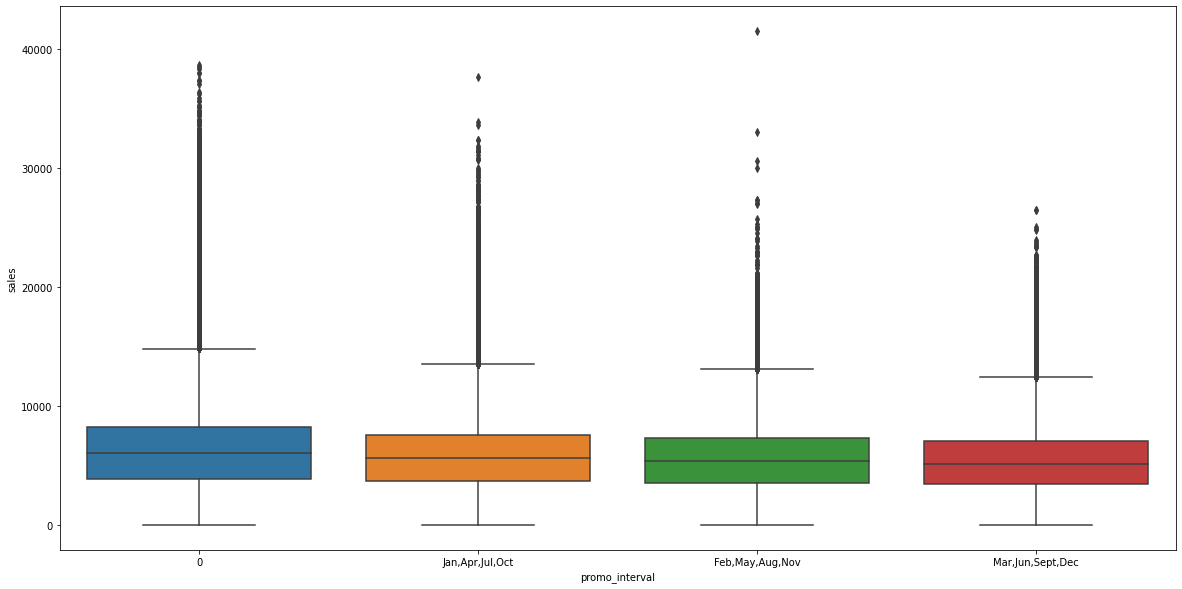

In [138]:
# promo_interval => 4

sns.boxplot(x='promo_interval', y='sales', data=df1)
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

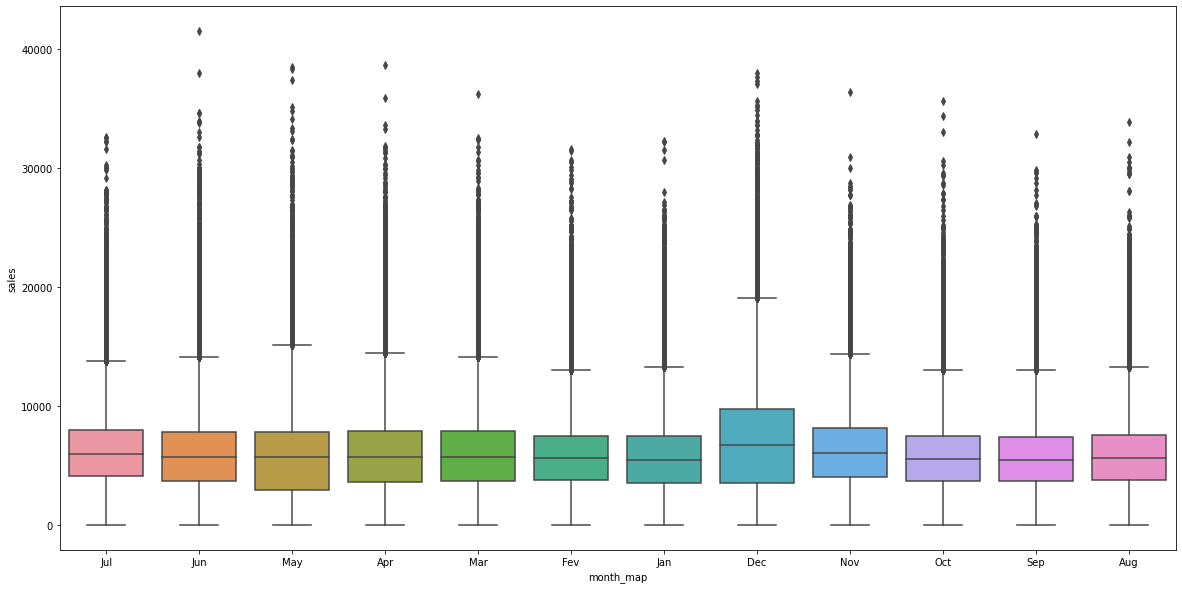

In [139]:
# month_map =>  12

sns.boxplot(x='month_map', y='sales', data=df1)
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

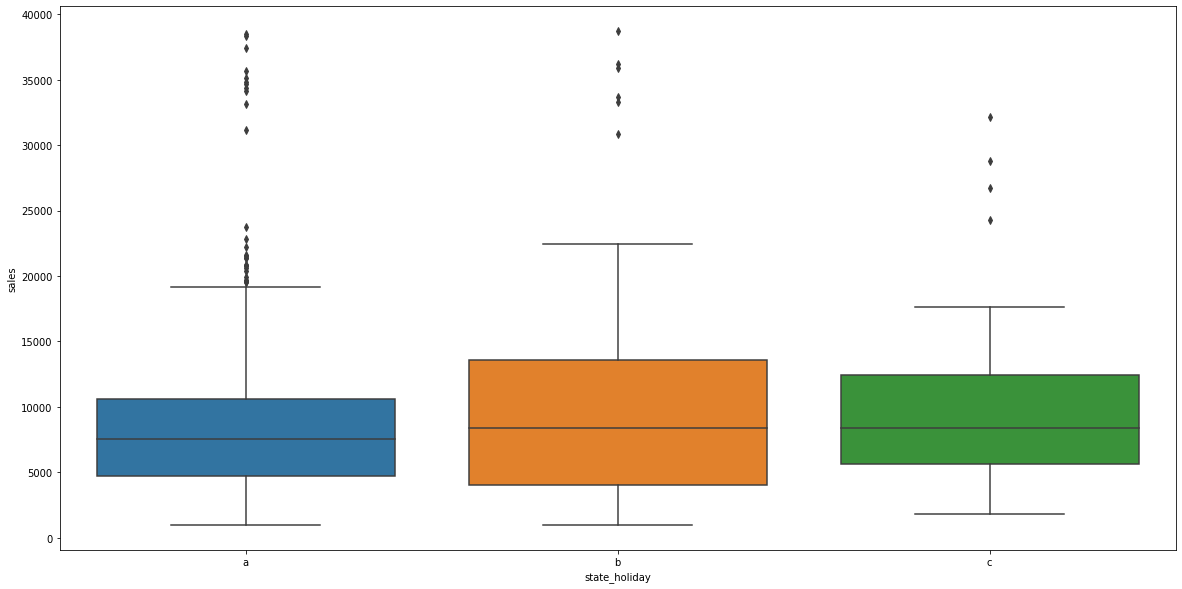

In [140]:
aux1 = df1[( df1['state_holiday' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'state_holiday', y = 'sales', data = aux1 )
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

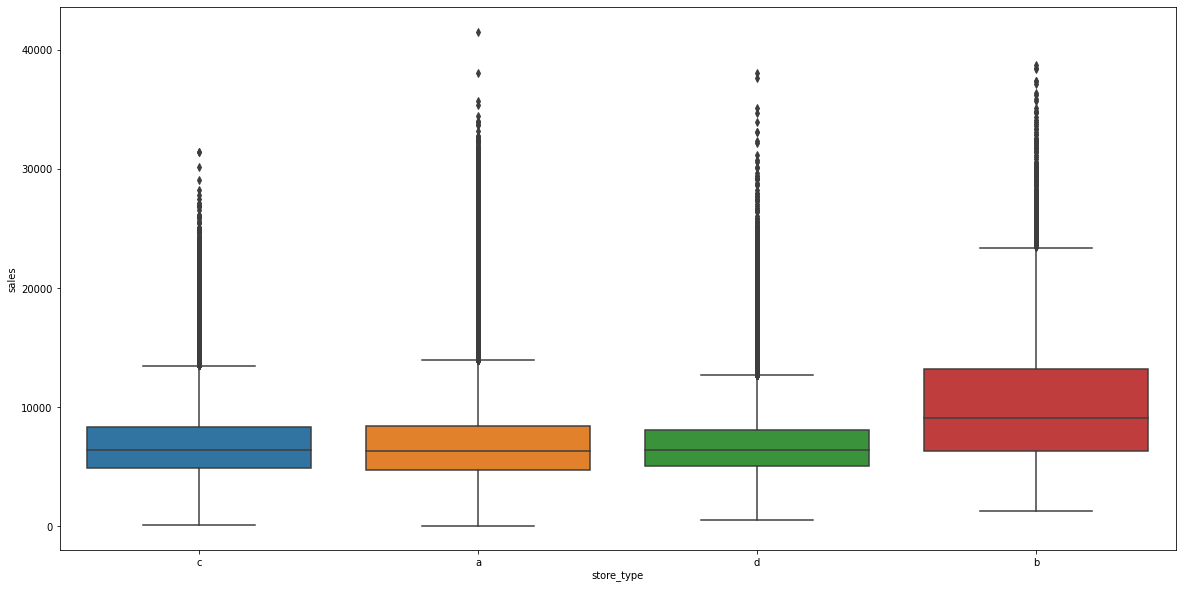

In [141]:
aux1 = df1[( df1[ 'store_type' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'store_type', y = 'sales', data = aux1 )
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

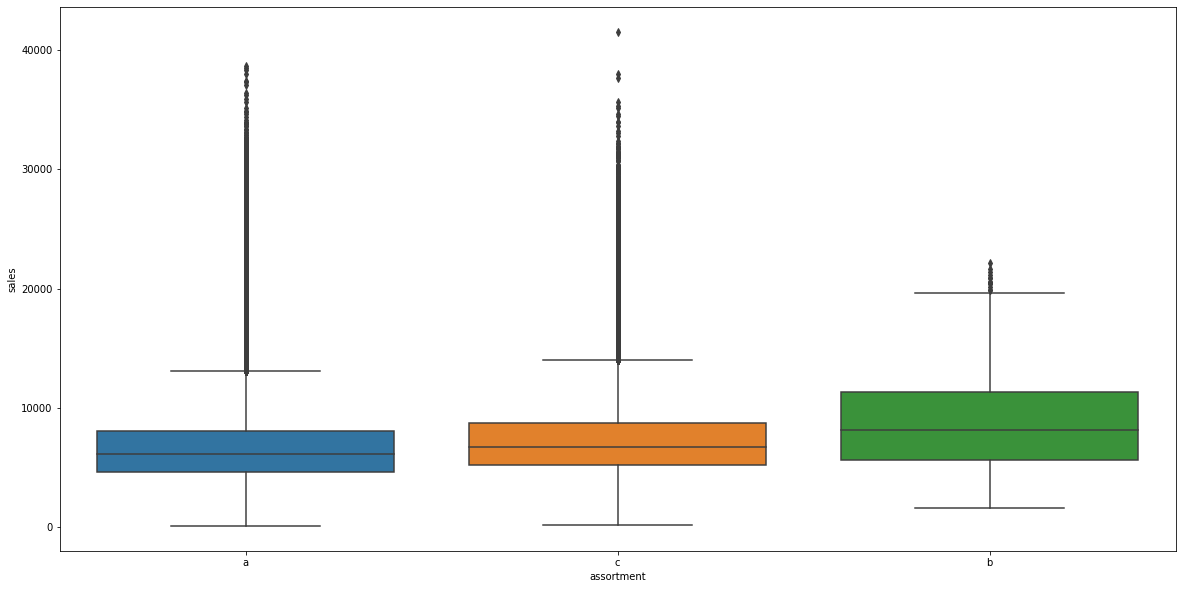

In [142]:
aux1 = df1[( df1[ 'assortment' ] != '0' ) & (df1[ 'sales' ] > 0 ) ]

sns.boxplot( x = 'assortment', y = 'sales', data = aux1 )
plt.rcParams["figure.size"]=(20,10)

KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

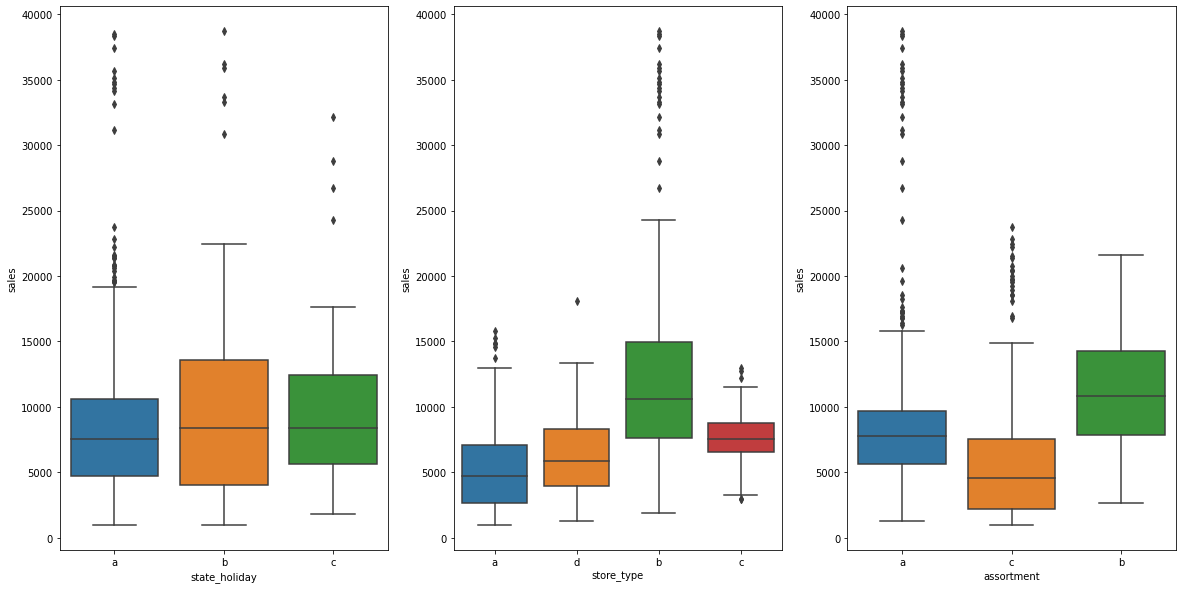

In [143]:
aux1 = df1[ ( df1['state_holiday'] !='0' ) & ( df1['sales'] > 0 ) ]

plt.subplot( 1, 3, 1 )
sns.boxplot( x='state_holiday', y='sales', data=aux1 )

plt.subplot( 1, 3, 2 )
sns.boxplot( x='store_type', y='sales', data=aux1 )

plt.subplot( 1, 3, 3 )
sns.boxplot( x='assortment', y='sales', data=aux1 )
plt.rcParams["figure.size"]=(20,10)

# 2.0 FEATURE ENGINEERING:

In [144]:
df2 = df1.copy()

# 2.1 Mapa mental de hipóteses:

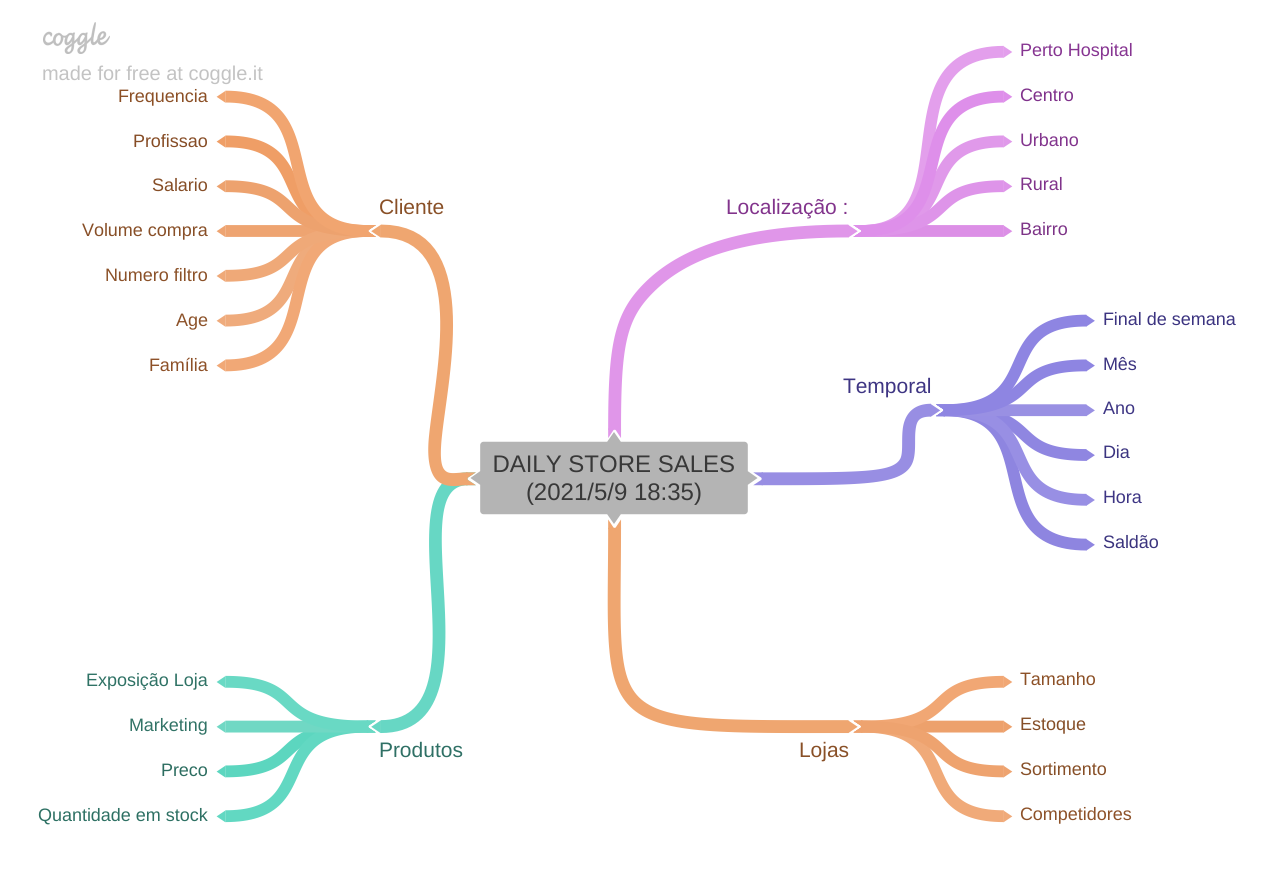

In [145]:
Image ( 'daily_store_map_image.png' )

# 2.2 Criação de hipóteses:

# 2.3 Lista final de hipóteses:

### 1) Lojas com maior sortimentos deveriam vender mais.
### 2) Lojas com competidores mais próximos deveriam vender menos.
### 3) Lojas com competidores à mais tempo deveriam vender mais.
### 4) Lojas com promoções ativas por amis tempo deveriam vender mais.
### 5) Lojas com mais dias de promoção deveriam vender mais.
### 6) Lojas com mais promoções consecutivas deveriam vender mais.
### 7) Lojas abertas durante o feriado de Natal deveriam vender mais.
### 8) Lojas deveriam vender mais ao longo dos anos.
### 9) Lojas deveriam vender mais no segundo semestre do ano.
### 10) Lojas deveriam vender mais depoois do dia 10 de cada mês.
### 11) Lojas deveriam ver menos aos finais de semana.
### 12) Lojas deveriam vender menos durante os feriados escolares.













In [146]:
# year:
df2['year'] = df2['date'].dt.year

# month:
df2['month'] = df2['date'].dt.month

# week of year:
df2['week_of_year'] = df2['date'].dt.weekofyear

# day
df2['day'] = df2['date'].dt.day

# year week:
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

# competition since:
df2['competition_since'] = df2.apply( lambda x: datetime.datetime( year= x['competition_open_since_year'], month= x['competition_open_since_month'], day= 1 ), axis= 1 )

df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] )/30 ).apply( lambda x: x.days ).astype( int )

# promo since:
df2['promo_since'] = df2['promo2_since_year'].astype( str ) + '-' + df2['promo2_since_week'].astype( str )

df2['promo_since'] = df2['promo_since'].apply( lambda x: datetime.datetime.strptime( x + '-1', '%Y-%W-%w' ) - datetime.timedelta( days=7 ) )

df2['promo_time_week'] = ( ( df2['date'] - df2['promo_since'] )/7 ).apply( lambda x: x.days ).astype( int )

# assortment:
# a = basic, b = extra, c = extendend

df2['assortment'] = df2['assortment'].apply( lambda x: 'basic' if x == 'a' else 'extra' if x =='b' else 'extendend' )

# state holiday:
# a = public holiday, b = Easter holiday, c = Christmas 

df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday' if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' )


<ipython-input-146-0c83ee3cec32>:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


In [147]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 FILTRAGEM DE DADOS:

In [148]:
df3 = df2.copy()

In [150]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,week_of_year,day,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


# 3.1 Filtragem de linhas:

In [151]:
df3 = df3[( df3['open'] != 0 ) & ( df3['sales'] > 0 )]

# 3.2 Seleção das colunas:

In [152]:
cols_drop = ['customers', 'open','promo_interval','month_map']
df3 = df3.drop( cols_drop, axis=1 )

In [153]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'week_of_year', 'day', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')

# 4.0 ANALISE EXPLORATORIA DE DADOS:

In [154]:
df4 = df3.copy()

In [155]:
df4

,store,day_of_week,date,sales,promo,state_holiday,school_holiday,store_type,assortment,competition_distance,...,is_promo,year,month,week_of_year,day,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,1,regular_day,1,c,basic,1270.0,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,1,regular_day,1,a,basic,570.0,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,1,regular_day,1,a,basic,14130.0,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1,regular_day,1,c,extendend,620.0,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,1,regular_day,1,a,basic,29910.0,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,0,public_holiday,1,b,basic,150.0,...,0,2013,1,1,1,2013-00,2006-09-01,77,2012-12-31,0
1016827,733,2,2013-01-01,10765,0,public_holiday,1,b,extra,860.0,...,0,2013,1,1,1,2013-00,1999-10-01,161,2012-12-31,0
1016863,769,2,2013-01-01,5035,0,public_holiday,1,b,extra,840.0,...,1,2013,1,1,1,2013-00,2013-01-01,0,2012-11-19,6
1017042,948,2,2013-01-01,4491,0,public_holiday,1,b,extra,1430.0,...,0,2013,1,1,1,2013-00,2013-01-01,0,2012-12-31,0


# 4.1 Analise Univariada:

### 4.1.1. Response Variable:

C:\Users\eduardo\anaconda3\envs\Rossmann_Stores_Sales\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


KeyError: 'figure.size is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

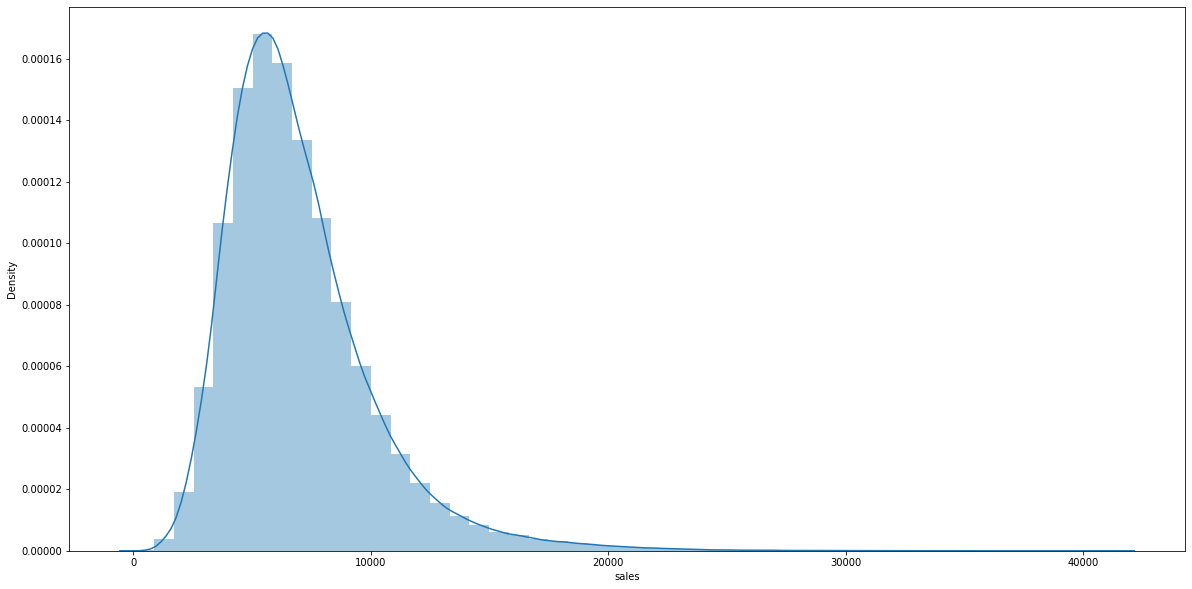

In [156]:
sns.distplot( df4['sales'], kde = True )
plt.rcParams["figure.size"]=(20,10)

### 4.1.2. Numerical Variable:

In [ ]:
num_attributes.hist(bins=20);
plt.rcParams["figure.size"]=(10,10)


### 4.1.3. Categorical Variable:

In [ ]:
cat_attributes.head()

In [ ]:
df4['state_holiday'].drop_duplicates()

# state holiday:

plt.subplot( 3, 2, 1 )
a = df4[ df4['state_holiday'] != 'regular_day' ]
sns.countplot( a['state_holiday'] )

plt.subplot( 3, 2, 2 )
sns.kdeplot( df4[ df4['state_holiday'] == 'public_holiday']   ['sales'], label='public_holiday',    shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'easter_holiday']   ['sales'], label='easter_holiday',    shade=True )
sns.kdeplot( df4[ df4['state_holiday'] == 'chrstimas_holiday']['sales'], label='chrstimas_holiday', shade=True )


# story type:

plt.subplot( 3, 2, 3 )
sns.countplot( df4['store_type'])

plt.subplot( 3, 2, 4 )
sns.kdeplot( df4[ df4['store_type'] == 'a']['sales'], label='a', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'c']['sales'], label='c', shade=True )
sns.kdeplot( df4[ df4['store_type'] == 'd']['sales'], label='d', shade=True )


# assortment:

plt.subplot( 3, 2, 5 )
sns.countplot( df4['assortment'])

plt.subplot( 2, 2, 6 )
sns.kdeplot( df4[ df4['assortment'] == 'a']['sales'], label='extended', shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'b']['sales'], label='basic',    shade=True )
sns.kdeplot( df4[ df4['assortment'] == 'c']['sales'], label='extra',    shade=True )
plt.rcParams["figure.size"]=(1,5)



# 4.2 Analise Bivariada:

### H1. Lojas com maior sortimentos deveriam vender mais:
**FALSA** Lojas com MAIOR SORTMENTO vendem MENOS.

In [ ]:
aux1 = df4[['assortment', 'sales']].groupby( 'assortment' ).sum().reset_index()
sns.barplot( x = 'assortment', y='sales', data = aux1 );

In [ ]:
aux2 = df4[['assortment', 'sales', 'year_week']].groupby( [ 'year_week', 'assortment' ] ).sum().reset_index()
aux2.pivot( index = 'year_week', columns ='assortment', values ='sales' ).plot()

In [ ]:
aux3 =  aux2[ aux2['assortment'] == 'extra' ]
aux3.pivot( index = 'year_week', columns ='assortment', values = 'sales' ).plot()

### H2. Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS.

In [ ]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()
sns.barplot( x = 'competition_distance', y = 'sales', data = aux1 );

In [ ]:
aux1.sample(4)

In [ ]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

bins = list( np.arange(0, 20000, 1000) )

aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned' ).sum().reset_index()

sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );

In [ ]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

sns.scatterplot( x ='competition_distance', y='sales', data=aux1 );

In [ ]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.subplot( 1, 3, 1)
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 )

plt.subplot( 1, 3, 2)
sns.scatterplot( x ='competition_distance', y='sales', data=aux1 )
bins = list( np.arange(0, 20000, 1000) )
aux1['competition_distance_binned'] = pd.cut( aux1['competition_distance'], bins=bins )
aux2 = aux1[['competition_distance_binned','sales']].groupby('competition_distance_binned' ).sum().reset_index()
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 1, 3, 3)
sns.heatmap( aux1.corr( method='pearson' ), annot=True );

### H3. Lojas com competidores á mais tempo deveriam vender  mais.
**FALSA** Lojas com COMPETIDORES A MAIS TEMPO vendem MENOS.

In [ ]:
aux1 = df4[['competition_time_month', 'sales']].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )]

sns.barplot( x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90);

In [ ]:

plt.subplot( 1, 3, 1 )
aux1 = df4[['competition_time_month', 'sales']].groupby( 'competition_time_month' ).sum().reset_index()
aux2 = aux1[( aux1['competition_time_month'] < 120 ) & ( aux1['competition_time_month'] != 0 )]

sns.barplot( x='competition_time_month', y='sales', data=aux2 );
plt.xticks( rotation=90);

plt.subplot( 1, 3, 2 )
sns.regplot( x='competition_time_month', y='sales', data=aux2 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson'), annot=True );

### H4. Lojas com promoções ativas por mais tempo deveriam vender mais.
**FALSA** Lojas com promoçoes ativas por mais tempo vendem menos, depois de um certo período.

In [ ]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

sns.barplot( x='promo_time_week', y='sales', data=aux1 );

plt.subplot(2, 1, 1)
aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot(2, 1, 2)
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

In [ ]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

sns.barplot( x='promo_time_week', y='sales', data=aux1 );

plt.subplot( 2, 2, 1)
aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( 2, 2, 2 )
sns.regplot(x='promo_time_week', y='sales', data=aux2);

plt.subplot(2, 2, 3 )
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

plt.subplot( 2, 2, 4 )
sns.regplot( x='promo_time_week', y='sales', data=aux3 );

In [ ]:
import matplotlib.gridspec as gridspec

In [ ]:
aux1 = df4[['promo_time_week','sales']].groupby('promo_time_week').sum().reset_index()

grid = gridSpec(2,3)

plt.subplot(grid[0,0] )
aux2 = aux1[aux1['promo_time_week'] > 0 ] # promo extendido
sns.barplot( x='promo_time_week', y='sales', data=aux2 );
plt.xticks( rotation=90 );

plt.subplot( grid[0,1] )
sns.regplot(x='promo_time_week', y='sales', data=aux2);

plt.subplot( grid[1,0] )
aux3 = aux1[aux1['promo_time_week'] < 0 ] # promo regular
sns.barplot( x='promo_time_week', y='sales', data=aux3 );
plt.xticks( rotation=90 );

plt.subplot(grid[1,1] )
sns.regplot(x='promo_time_week', y='sales', data=aux3)

plt.subplot( grid[:,2] )
sns.heatmap( aux1.corr(method='person' ), annot=True );

### H6 Lojas com mais promoções consecutivas deveriam vender mais.
**FALSA Lojas com promoções consecutivas vendem menos.**

In [ ]:
df4[['promo', 'promo2', 'sales']].groupby(['promo', 'promo2']).sum().reset_index()

In [ ]:
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[( df4['promo'] == 0 ) & ( df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax = ax)
ax.legend(labels=['Tradicional & Extendida', 'Extendida']);

In [ ]:
aux1 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 1)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
ax = aux1.plot()

aux2 = df4[( df4['promo'] == 1 ) & ( df4['promo2'] == 0)][['year_week', 'sales']].groupby('year_week').sum().reset_index()
aux2.plot(ax = ax)
ax.legend( labels = ['Tradicional & Extendida', 'Extendida']);

### H8 Lojas abertas durante o feriado de Natal deveriam vender mais.
**FALSA Lojas abertas durante o feriado de Natal vendem menos.

In [ ]:
aux = df4[df4['state_holiday']!= 'regular_day']

plt.subplot( 1, 2, 1 )
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
sns.barplot( x='state_holiday', y='sales', data=aux1);

plt.subplot( 1, 2, 2 )
aux2 = aux[['year','state_holiday','sales']].groupby( ['year','state_holiday'] ).sum().reset_index()
sns.barplot( x='year', y='sales', hue='state_holiday',data=aux2);

### H9 Lojas deveriam vender mais ao longo dos anos.
**FALSA Lojas vendem menos ao longo dos anos.

In [ ]:
plt.subplot( 1, 3, 1)
aux1 = df4[['year', 'sales']].groupby('year').sum().reset_index()
sns.barplot( x='year', y='sales', data=aux1);

plt.subplot( 1, 3, 2)
sns.regplot(x='year', y='sales', data=aux1);

plt.subplot( 1, 3, 3)
sns.heatmap( aux1.corr(method='pearson'), annot=True);

### H10 Lojas deveriam vender mais no segundo semestre do ano.
**FALSA Lojas vendem menos no segundo semestre.**

In [ ]:
plt.subplot( 1, 3, 1 )
aux1 = df4[['month', 'sales']].groupby('month').sum().reset_index()
sns.barplot(x='month', y='sales', data=aux1);

plt.subplot( 1, 3, 2 )
sns.regplot(x='month', y='sales', data=aux1);

plt.subplot( 1, 3, 3 )
sns.heatmap(aux1.corr(method='pearson'), annot=True );

### H11 Lojas deveriam vender mais depois do dia 10 de cada mês.
**VERDADEIRA** Lojas vendem mais após 10 primeiros dias de cada mês.


In [ ]:
plt.subplot( 2, 2, 1 )
aux1 = df4[['day', 'sales']].groupby('day').sum().reset_index()
sns.barplot( x='day', y='sales', data= aux1 );

plt.subplot( 2, 2, 2 )
sns.regplot( x='day', y='sales', data= aux1 );

plt.subplot( 2, 2, 3 )
sns.heatmap( aux1.corr(method ='pearson'), annot=True )

plt.subplot( 2, 2, 4 )
aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10days' if x<= 10 else 'after_10_days' )
aux2 = aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()
sns.barplot(x='before_after', y='sales', data=aux2)

### H12 Lojas deveriam ver menos aos finais de semana.
**VERDADEIRA Lojas vendem menos aos finais de semana.

<AxesSubplot:>

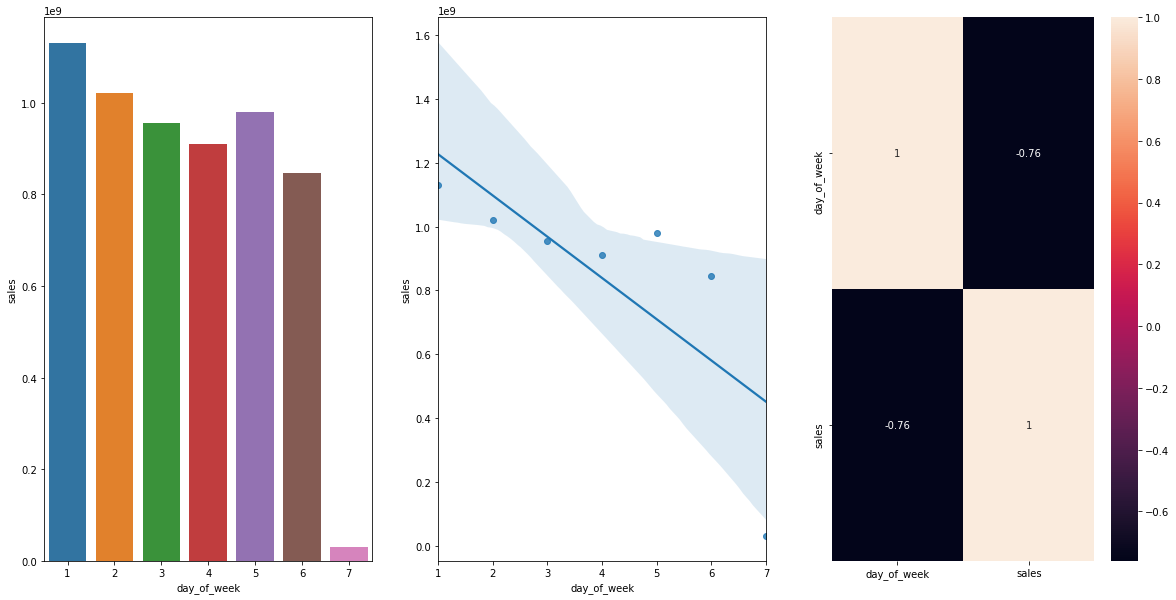

In [157]:
plt.subplot( 1, 3, 1 )
aux1 = df4[['day_of_week', 'sales']].groupby('day_of_week').sum().reset_index()
sns.barplot( x='day_of_week', y='sales', data=aux1 )

plt.subplot( 1, 3, 2 )
sns.regplot( x='day_of_week', y='sales', data=aux1 )

plt.subplot( 1, 3, 3)
sns.heatmap(aux1.corr(method='pearson'), annot=True )

### H13 Lojas deveriam vender menos durante os feriados escolares.
**

<AxesSubplot:xlabel='month', ylabel='sales'>

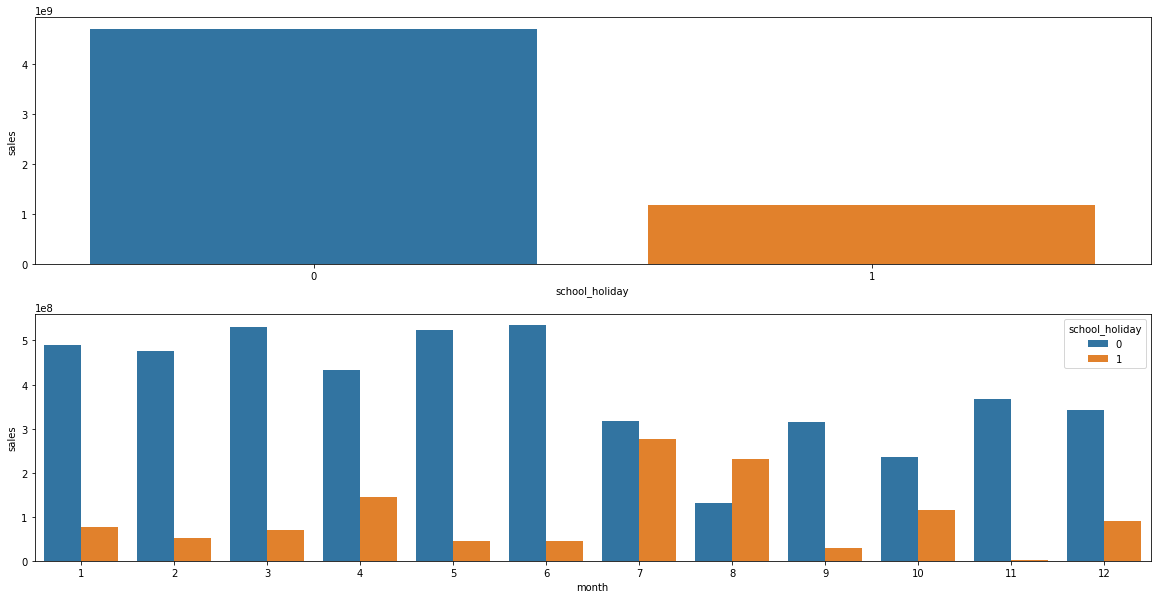

In [158]:
aux1 = df4[['school_holiday', 'sales']].groupby('school_holiday').sum().reset_index()

plt.subplot( 2, 1, 1 )
sns.barplot( x='school_holiday', y='sales', data=aux1 )


aux2 = df4[['month', 'school_holiday', 'sales']].groupby(['month', 'school_holiday']).sum().reset_index()
plt.subplot( 2, 1, 2 )
sns.barplot( x='month', y='sales', hue='school_holiday', data=aux2 )                                                   

# 4.3 Analise Multivariada: